In [133]:
# used for dataframe access/manipulation
import pandas as pd
from pandas import DataFrame
# used for mathematical operations
import numpy as np
# used for graphing
import seaborn as sns

# [Dataset](https://www.kaggle.com/datasets/utkarshx27/breast-cancer-dataset-used-royston-and-altman)

This is a dataset comprising of breast cancer patient data, I will be using this dataset to try to predict what level of breast cancer the patient has based on their symptoms. This will be a bit more challenging of a model to create due to the previous challenge, which was relatively straightforward (just had to plug in the target + features into LogisticRegression and the rest was history). I will most likely have to tweak some of the columns, categorize the values a bit to get a good result, but this will serve to be an excellent beginner challenge as well as I get back in the machine learning hot-seat.

In [134]:
# loading in the csv file
breast_cancer_dataframe: DataFrame = pd.read_csv('./gbsg.csv')

# displaying the # of rows and columns
breast_cancer_dataframe.shape

(686, 12)

We only have 686 rows of data, so not bad at all for a dataset size that is not too large. We also have 11 features, one being the target, let's see what kind of columns we have.

In [135]:
# dropping the column that is not necessary
bc_df = breast_cancer_dataframe.drop(columns=['Unnamed: 0'])

bc_df.columns

Index(['pid', 'age', 'meno', 'size', 'grade', 'nodes', 'pgr', 'er', 'hormon',
       'rfstime', 'status'],
      dtype='object')

Now we have a total of 9 features, because one of the columns was garbage data that was unnecessary in making a prediction.

According to the specifications outlined in the dataset linked, our target column will most cause our model to be a form of logistic regression, that column would be the status column, which contains a value of either 0 or 1, 0 meaning surviving or 1 meaning the patient has passed away. That fits directly into the criteria of logistic regression, where we are not trying to predict a continuous value, but a discrete one, either 0 or 1.

### Creating the Logistic Regression Model

0.7718023255813954

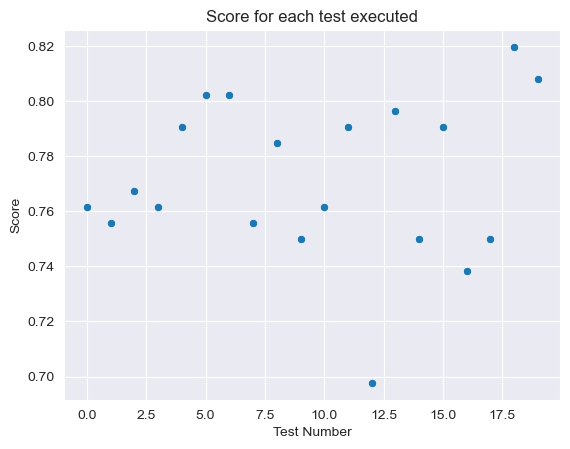

In [136]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

# construct the features from the existing dataframe
features = bc_df.drop(columns=['status'])

test_number = []
scores = []

for i in range(20):
    train_x, test_x, train_y, test_y = train_test_split(features, bc_df['status'])

    # create the model we are using to
    model = LogisticRegressionCV(solver='liblinear')

    # fit with the split data
    model.fit(train_x, train_y)

    # calculate the score
    score = model.score(test_x, test_y)
    test_number.append(i)
    scores.append(score)

ax = sns.scatterplot(x=test_number, y=scores)
ax.set_xlabel("Test Number")
ax.set_ylabel("Score")
ax.set_title("Score for each test executed")
np.average(scores)


Our average score is about .775, which isn't the brightest, we want to reach maybe mid 80s, low 90s, let's see if we can consolidate some of the columns in the dataframe

In [137]:
bc_df.describe()

,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,966.061224,53.052478,0.577259,29.329446,2.116618,5.010204,109.995627,96.252187,0.358601,1124.489796,0.435860
std,495.506249,10.120739,0.494355,14.296217,0.582808,5.475483,202.331552,153.083963,0.479940,642.791948,0.496231
min,1.000000,21.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,580.750000,46.000000,0.000000,20.000000,2.000000,1.000000,7.000000,8.000000,0.000000,567.750000,0.000000
50%,1015.500000,53.000000,1.000000,25.000000,2.000000,3.000000,32.500000,36.000000,0.000000,1084.000000,0.000000
75%,1340.500000,61.000000,1.000000,35.000000,2.000000,7.000000,131.750000,114.000000,1.000000,1684.750000,1.000000
max,1819.000000,80.000000,1.000000,120.000000,3.000000,51.000000,2380.000000,1144.000000,1.000000,2659.000000,1.000000


We may want to remove the patient id, as that has no help on whether the patient will survive/die from breast cancer

In [138]:
removed_pid: DataFrame = features.drop(columns=['pid'])

removed_pid.head()

,age,meno,size,grade,nodes,pgr,er,hormon,rfstime
0,49,0,18,2,2,0,0,0,1838
1,55,1,20,3,16,0,0,0,403
2,56,1,40,3,3,0,0,0,1603
3,45,0,25,3,1,0,4,0,177
4,65,1,30,2,5,0,36,1,1855


Now that we've removed the patient id, we may have a stronger prediction, because that patient id was causing major issues with our statistics, and overall have a better prediction.

0.688953488372093

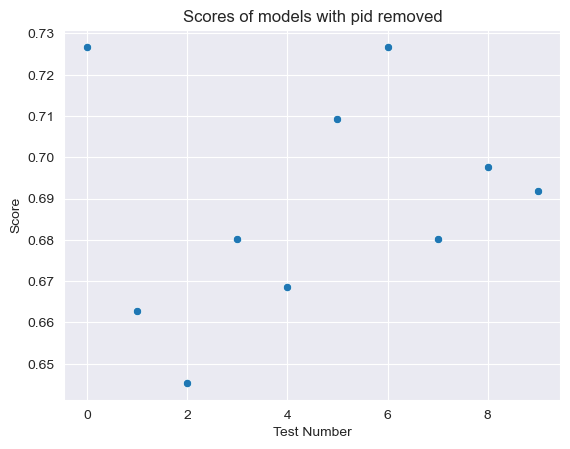

In [139]:
# second model
scores = []
test_number = []
for i in range(10):
    # create model
    second_model = LogisticRegressionCV(solver='liblinear')

    # split removed data
    r_train_x, r_test_x, r_train_y, r_test_y = train_test_split(removed_pid, bc_df['status'])

    # fit with training data
    second_model.fit(r_train_x, r_train_y)

    # generate score
    score = second_model.score(r_test_x, r_test_y)
    scores.append(score)
    test_number.append(i)

ax = sns.scatterplot(x=test_number, y=scores)
ax.set_xlabel("Test Number")
ax.set_ylabel("Score")
ax.set_title("Scores of models with pid removed")
np.average(scores)

Removing pid actually caused the new model to perform worse (odd enough), so that leads us to believe that we need to improve some columns within the dataframe, let's see which columns we could potentially change.

In [140]:
removed_pid.describe()

,age,meno,size,grade,nodes,pgr,er,hormon,rfstime
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,53.052478,0.577259,29.329446,2.116618,5.010204,109.995627,96.252187,0.358601,1124.489796
std,10.120739,0.494355,14.296217,0.582808,5.475483,202.331552,153.083963,0.479940,642.791948
min,21.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000
25%,46.000000,0.000000,20.000000,2.000000,1.000000,7.000000,8.000000,0.000000,567.750000
50%,53.000000,1.000000,25.000000,2.000000,3.000000,32.500000,36.000000,0.000000,1084.000000
75%,61.000000,1.000000,35.000000,2.000000,7.000000,131.750000,114.000000,1.000000,1684.750000
max,80.000000,1.000000,120.000000,3.000000,51.000000,2380.000000,1144.000000,1.000000,2659.000000


We could possibly discern rfstime to a more consolidated value, rather then all over the place, as the minimum is 8 but the maximum is 2659, so let's set some limits to test. Let's say that anything < 800 days is low, and anything < 1600 is medium, and anything after is high, to maybe consolidate the column a bit

In [141]:
import math

removed_pid['rfstime'] = removed_pid['rfstime'].map(lambda x: 1 / (1 + math.exp(-1 * x)))

removed_pid.head()

,age,meno,size,grade,nodes,pgr,er,hormon,rfstime
0,49,0,18,2,2,0,0,0,1.0
1,55,1,20,3,16,0,0,0,1.0
2,56,1,40,3,3,0,0,0,1.0
3,45,0,25,3,1,0,4,0,1.0
4,65,1,30,2,5,0,36,1,1.0


Let's try using ridge regression to see if we can get an slightly improved score, let's use it with the sigmoid function applied to the rfstime variable

In [142]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

r_train_x, r_test_x, r_train_y, r_test_y = train_test_split(removed_pid, bc_df['status'])

ridge_model.fit(r_train_x, r_train_y)

ridge_model.score(r_test_x, r_test_y)

0.12280237990265908

As we can see from this score, linear regression models perform horribly with this dataset, we need to find a good model or a good combination of parameters to apply to a logistic model to get a satisfactory score out of this dataset.

In [143]:
# Why not try hyper-parameter tuning?
from sklearn.model_selection import GridSearchCV

model = LogisticRegressionCV()

train_x, test_x, train_y, test_y = train_test_split(removed_pid, bc_df['status'])

model.fit(train_x, train_y)

model.score(test_x, test_y)
# parameters = {
#     'penalty': ['l1', 'l2', 'elasticnet', None],
#     'dual': [True, False],
#     'class_weight': [None, 'balanced'],
#     'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
#     'max_iter': [100, 500, 1000]
# }
#
# gsv = GridSearchCV(estimator=LogisticRegressionCV(), param_grid=parameters)

# print(gsv.estimator.get_params().keys())
# train_x, test_x, train_y, test_y = train_test_split(removed_pid, bc_df['status'])
#
# gsv.fit(train_x, train_y)
# # gsv.score(test_x, test_y)
#
# print(gsv.cv_results_)

C:\Users\flyin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\flyin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.6162790697674418

We keep getting this error trying to fit the logistic regressor with the training data, this means we have to normalize the data to achieve a higher performance, maybe my idea about normalizing the rfstime was correct, and that will improve the performance, let's try doing that.

In [144]:
normalized_rfstime = removed_pid.copy()

normalized_rfstime['rfstime'] = normalized_rfstime['rfstime'].map(lambda x: 0 if x <= 800 else 1 if x <= 1600 else 2)

normalized_rfstime.head()


,age,meno,size,grade,nodes,pgr,er,hormon,rfstime
0,49,0,18,2,2,0,0,0,0
1,55,1,20,3,16,0,0,0,0
2,56,1,40,3,3,0,0,0,0
3,45,0,25,3,1,0,4,0,0
4,65,1,30,2,5,0,36,1,0


Now that we have the data normalized (instead of a bunch of ranging floats, we have three categories of rfstime, short, medium, and long, maybe that will improve performance, let's check the describe of this dataframe first to check how spread out all of the values are.

In [145]:
normalized_rfstime.describe()

,age,meno,size,grade,nodes,pgr,er,hormon,rfstime
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.0
mean,53.052478,0.577259,29.329446,2.116618,5.010204,109.995627,96.252187,0.358601,0.0
std,10.120739,0.494355,14.296217,0.582808,5.475483,202.331552,153.083963,0.479940,0.0
min,21.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,46.000000,0.000000,20.000000,2.000000,1.000000,7.000000,8.000000,0.000000,0.0
50%,53.000000,1.000000,25.000000,2.000000,3.000000,32.500000,36.000000,0.000000,0.0
75%,61.000000,1.000000,35.000000,2.000000,7.000000,131.750000,114.000000,1.000000,0.0
max,80.000000,1.000000,120.000000,3.000000,51.000000,2380.000000,1144.000000,1.000000,0.0


As we can see in the describe, the mean is 0? This means that we set all of our values to 0! That is because we used the sigmoid function on the rfstime before refactoring it, so that means all the value were <= 800, therefore all being 0, let's clean this up, copy over the original dataset with pid removed.

In [146]:
new_normalized_rfstime = features.drop(columns=['pid'])

new_normalized_rfstime.head()

,age,meno,size,grade,nodes,pgr,er,hormon,rfstime
0,49,0,18,2,2,0,0,0,1838
1,55,1,20,3,16,0,0,0,403
2,56,1,40,3,3,0,0,0,1603
3,45,0,25,3,1,0,4,0,177
4,65,1,30,2,5,0,36,1,1855


There! That looks a lot better, now we can apply the normalization technique to see if that changes the performance.

In [147]:
new_normalized_rfstime['rfstime'] = new_normalized_rfstime['rfstime'].map(
    lambda x: 0 if x <= 800 else 1 if x <= 1600 else 2)

new_normalized_rfstime.describe()


,age,meno,size,grade,nodes,pgr,er,hormon,rfstime
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,53.052478,0.577259,29.329446,2.116618,5.010204,109.995627,96.252187,0.358601,0.897959
std,10.120739,0.494355,14.296217,0.582808,5.475483,202.331552,153.083963,0.479940,0.814877
min,21.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,20.000000,2.000000,1.000000,7.000000,8.000000,0.000000,0.000000
50%,53.000000,1.000000,25.000000,2.000000,3.000000,32.500000,36.000000,0.000000,1.000000
75%,61.000000,1.000000,35.000000,2.000000,7.000000,131.750000,114.000000,1.000000,2.000000
max,80.000000,1.000000,120.000000,3.000000,51.000000,2380.000000,1144.000000,1.000000,2.000000


Alright, that refactoring looks a lot better, now we have transformed the continious variable of rfstime into a discrete variable of short, medium and long time.

In [148]:
## apply logistic regression to normalized values

new_normalized_logistic_model = LogisticRegressionCV()

nn_train_x, nn_test_x, nn_train_y, nn_test_y = train_test_split(new_normalized_rfstime, bc_df['status'])

new_normalized_logistic_model.fit(nn_train_x, nn_train_y)

C:\Users\flyin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\flyin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV()

It appears we still have some issues processing the data, maybe we could apply the sigmoid function to the columns with high standard deviation to normalize the data a bit to avoid having issues fitting it into a logistic regressor.

In [149]:
new_normalized_rfstime.describe()

,age,meno,size,grade,nodes,pgr,er,hormon,rfstime
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,53.052478,0.577259,29.329446,2.116618,5.010204,109.995627,96.252187,0.358601,0.897959
std,10.120739,0.494355,14.296217,0.582808,5.475483,202.331552,153.083963,0.479940,0.814877
min,21.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,20.000000,2.000000,1.000000,7.000000,8.000000,0.000000,0.000000
50%,53.000000,1.000000,25.000000,2.000000,3.000000,32.500000,36.000000,0.000000,1.000000
75%,61.000000,1.000000,35.000000,2.000000,7.000000,131.750000,114.000000,1.000000,2.000000
max,80.000000,1.000000,120.000000,3.000000,51.000000,2380.000000,1144.000000,1.000000,2.000000


In [150]:
## applying the sigmoid

sigmoid = lambda x: 1 / 1 + math.exp(-1 * x)

new_normalized_rfstime['pgr'] = new_normalized_rfstime['pgr'].map(sigmoid)
new_normalized_rfstime['er'] = new_normalized_rfstime['er'].map(sigmoid)
new_normalized_rfstime['size'] = new_normalized_rfstime['size'].map(sigmoid)
new_normalized_rfstime['nodes'] = new_normalized_rfstime['nodes'].map(sigmoid)
new_normalized_rfstime['age'] = new_normalized_rfstime['age'].map(sigmoid)

new_normalized_rfstime.describe()

,age,meno,size,grade,nodes,pgr,er,hormon,rfstime
count,6.860000e+02,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,1.000000e+00,0.577259,1.000115,2.116618,1.129823,1.145495,1.133027,0.358601,0.897959
std,2.895844e-11,0.494355,0.002041,0.582808,0.152725,0.335410,0.325083,0.479940,0.814877
min,1.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000e+00,0.000000,1.000000,2.000000,1.000912,1.000000,1.000000,0.000000,0.000000
50%,1.000000e+00,1.000000,1.000000,2.000000,1.049787,1.000000,1.000000,0.000000,1.000000
75%,1.000000e+00,1.000000,1.000000,2.000000,1.367879,1.000912,1.000335,1.000000,2.000000
max,1.000000e+00,1.000000,1.049787,3.000000,1.367879,2.000000,2.000000,1.000000,2.000000


Now it appears we have a lowered standard deviation! So all the values are relatively close together, hopefully that allows us to fit the model into a logistic regressor finally without any issues.

In [151]:
sigmoid_logistic_regressor = LogisticRegressionCV()

s_train_x, s_test_x, s_train_y, s_test_y = train_test_split(new_normalized_rfstime, bc_df['status'])

sigmoid_logistic_regressor.fit(s_train_x, s_train_y)

sigmoid_logistic_regressor.score(s_test_x, s_test_y)

0.7093023255813954

Although we have applied the sigmoid to all the columns with high standard deviation to try to fit the data into a logistic regressor properly, in doing so, we have forfeited a high score due to heavily changing the data. Maybe there is a column we are processing when it is unnecessary, let's try to drop a few columns we find unnecessary.

In [152]:
modified_rfstime = features.drop(columns=['hormon', 'er', 'pgr', 'meno', 'pid'])

updated_log_regressor = LogisticRegressionCV()

ulr_train_x, ulr_test_x, ulr_train_y, ulr_test_y = train_test_split(modified_rfstime, bc_df['status'])

sigmoid_logistic_regressor.fit(ulr_train_x, ulr_train_y)

sigmoid_logistic_regressor.score(ulr_test_x, ulr_test_y)

0.7209302325581395

Dropping the columns and attempting to remove the complex columns from the dataset resulted in not quite what we were looking for, we're still falling in the 70s range, not close to the 80s or 90s. I will try to use the PassiveAggressiveClassifier to properly classify this data into the categories, and I will also be using the PA-II algorithm (the squared hinge loss algorithm) for the loss function, as it supports models with high levels of variance, which is the issue I am running into when trying to make predictions. The PA algorithm is a modification of the Perceptron algorithm, it is an online algorithm, and what that means is that it updates it's model while processing data, so if it gets a prediction wrong, it will adjust the weights in its internal model to hopefully get the future predictions correct. It internally splits the data you fit it with into train and test, and first begins to train, adjusting the weights, and then begins to make the predictions with the internally adjusted model.

In [153]:
from sklearn.linear_model import PassiveAggressiveClassifier, PassiveAggressiveRegressor

pac = PassiveAggressiveClassifier()

pac.fit(ulr_train_x, ulr_train_y)

pac_score = pac.score(ulr_test_x, ulr_test_y)

pacr = PassiveAggressiveRegressor(loss='squared_epsilon_insensitive')

pacr.fit(ulr_train_x, ulr_train_y)

pacr_score = pacr.score(ulr_test_x, ulr_test_y)

pac_score, pacr_score

(0.3488372093023256, -0.4597107210059459)

The passive-aggressive algorithm performed as bad as the linear regression, and the passive-aggressive regressor performed the worst out of all the algorithms! These are not the correct algorithms to be applying to this dataset no matter how we transform the data. This was expected though, as regressive algorithms are used to predict continuous values, while classification algorithms are used to predict discrete values.

In [154]:
# Ridge regression attempt

from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV

rc = RidgeClassifier()
rcv = RidgeClassifierCV()

rc.fit(s_train_x, s_train_y)
rcv.fit(s_train_x, s_train_y)

rc.score(s_test_x, s_test_y), rcv.score(s_test_x, s_test_y)



(0.7093023255813954, 0.7093023255813954)

As we can see from these results, the ridge classifier algorithm does not suit our needs for this dataset as well, the majority of the predictions are reaching the maximum of .75 mark, we want to break that and reach 80 consistently on one model at least.

Perhaps we need a better classifier to handle this problem, if we try all the classifiers, and still can't come up with a better score, maybe we should look into feature engineering?

In [155]:
from sklearn.linear_model import SGDClassifier

rc = SGDClassifier()

rc.fit(s_train_x, s_train_y)

rc.score(s_test_x, s_test_y)

0.6976744186046512

Now see, this isn't quite a good score, maybe we can observe some trends in the data? Let's try applying feature engineering to the original dataset!

In [156]:
# we can obviously drop the unnamed column and the pid column as they have no correlation to the actual data we are analyzing
feat_engineering_data = breast_cancer_dataframe.copy().drop(columns=['Unnamed: 0', 'pid'])

feat_engineering_data.columns

Index(['age', 'meno', 'size', 'grade', 'nodes', 'pgr', 'er', 'hormon',
       'rfstime', 'status'],
      dtype='object')

Let's look for some outliers, and try to find a pattern between them

In [157]:
feat_engineering_data.describe()

,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,53.052478,0.577259,29.329446,2.116618,5.010204,109.995627,96.252187,0.358601,1124.489796,0.435860
std,10.120739,0.494355,14.296217,0.582808,5.475483,202.331552,153.083963,0.479940,642.791948,0.496231
min,21.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,46.000000,0.000000,20.000000,2.000000,1.000000,7.000000,8.000000,0.000000,567.750000,0.000000
50%,53.000000,1.000000,25.000000,2.000000,3.000000,32.500000,36.000000,0.000000,1084.000000,0.000000
75%,61.000000,1.000000,35.000000,2.000000,7.000000,131.750000,114.000000,1.000000,1684.750000,1.000000
max,80.000000,1.000000,120.000000,3.000000,51.000000,2380.000000,1144.000000,1.000000,2659.000000,1.000000


As we can see, we have pgr and er as outliers, maybe we can find a way to deal with them

In [158]:
# find outliers using z-score formula
standard_deviation = np.std(feat_engineering_data['pgr'])
mean = np.mean(feat_engineering_data['pgr'])
threshold = 3  # collect all data points that are better than the 3rd standard deviation
outliers = []


# Function to compute whether the value supplied is an outlier
def filter_out_value(value: float) -> bool:
    """
    Takes in a value and computes whether it is an outlier

    :param value: The value we are testing
    :return: Whether the value is an outlier
    """
    z_score = (value - mean) / standard_deviation
    if np.abs(z_score) > threshold:
        return True
    return False


# gather column
values = feat_engineering_data['pgr']

# cycle through all values, determining the outliers among them, and adding their indexes to the array
for each_index in values.keys():
    value = values[each_index]  # grabbing the numerical value of the current index
    if filter_out_value(value):  # if it is an outlier
        outliers.append(each_index)  # add the index of it to the array

# for each outlier index in outliers
for each_outlier_index in outliers:
    # set the value to the mean of the total dataset
    values[each_outlier_index] = np.median(values)

# We decreased the total standard deviation from 202 to 102, so far a bit successful refactoring that part.
values.describe()


count    686.000000
mean      87.295918
std      122.224123
min        0.000000
25%        7.000000
50%       32.000031
75%      115.750000
max      680.000000
Name: pgr, dtype: float64

In [159]:
# Let's try just throwing a basic logistic regression at it, see what that does
from sklearn.linear_model import LogisticRegression

modified_feat_engineering_data = feat_engineering_data.copy()
modified_feat_engineering_data['pgr'] = values

feature_engineering_first_logistic_regression = LogisticRegression()

train_x, test_x, train_y, test_y = train_test_split(modified_feat_engineering_data,
                                                    modified_feat_engineering_data['status'])

feature_engineering_first_logistic_regression.fit(train_x, train_y)

C:\Users\flyin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

We are still running into the issue, maybe we should apply the same methodology (meaning it) to the other outlier column, 'er'

In [160]:
modified_feat_engineering_er_data = feat_engineering_data.copy()
er_values = modified_feat_engineering_er_data['er']

er_outliers = []
threshold = 3
std_er = np.std(er_values)
mean_er = np.mean(er_values)


def filter_er(value: float) -> bool:
    computation = (value - mean) / standard_deviation
    if np.abs(computation) > threshold:
        # marked as outlier
        er_outliers.append(value)
        return True
    return False


for each_value in er_values.keys():
    if filter_er(er_values[each_value]):
        er_outliers.append(each_value)

for each_index in er_outliers:
    er_values[each_index] = np.mean(er_values)

er_values.describe()

C:\Users\flyin\AppData\Local\Temp\ipykernel_11716\930199799.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  er_values[each_index] = np.mean(er_values)


count    694.000000
mean      86.515585
std      121.439647
min        0.000000
25%        8.000000
50%       38.000000
75%      104.750000
max      701.000000
Name: er, dtype: float64

In [173]:
# Let's try logistic classifier again!

from sklearn.linear_model import LogisticRegression

modified_feat_engineering_er_data['er'] = er_values
er_log = LogisticRegression()
train_x, test_x, train_y, test_y = train_test_split(modified_feat_engineering_er_data.drop(columns=['status']),
                                                    modified_feat_engineering_er_data['status'])

er_log.fit(train_x, train_y)
er_log.score(test_x, test_y)

C:\Users\flyin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6569767441860465

In [185]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10000)

rfc.fit(train_x, train_y)

rfc.score(test_x, test_y)

# clearly, random forest is not working either, we need to find either more data to add to the dataset, or maybe handle one more outlier (rfstime)

0.6802325581395349